# Time series 
## an analysis to extract meaningful characteristics of data and generate other useful insights applied in business situation. 

https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274

# Data Exploration
## 1. importing packages

In [3]:
import numpy as np
import pandas as pd
from pandas import datetime


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

from fbprophet import Prophet

/home/gmunge/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## 2. Load Data
### ways of loading data
>* ### read_csv;  csv (comma separated value) we use comma as the delimiter
>* ### read_excel;  for excel sheets
>* ### read_table; files use tab '\t' as the default delimiter
>* ### read_fwf; fixed width column format

In [4]:
df =pd.read_csv('train.csv')

## 3. convert variable Month to date time datatype

In [5]:
df['Month']= pd.DatetimeIndex(df['Month'])

### fb prophet also imposes the strict condition that the input columns renamed to
> ### ds (the time column)
> ### y (the metric column)

In [7]:
df = df.rename(columns={'Month': 'ds',
                        'Sales': 'y'})



### we either have;
>### univariate plots to understand each attribute 
>
>### Multivariate plots to understand relationship between the attributes

# visualization of the data

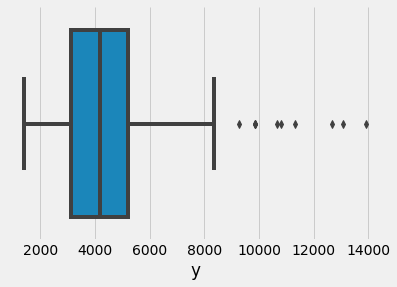

In [16]:
import seaborn as sns
sns.boxplot(df['y'])
sns.despine()

### from the box plot we see 
>### outliers
>### median at 4000; 50th percentile 
>### minimum and the maximum

### we plot a multivariate graph to relate sales versus time

### plot also a histogram

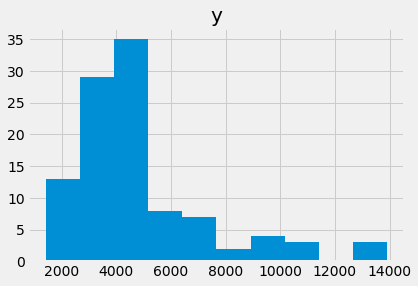

In [20]:
df.hist()
plt.show()

### we see that a retained value of 4000 of that company is what is occurin most

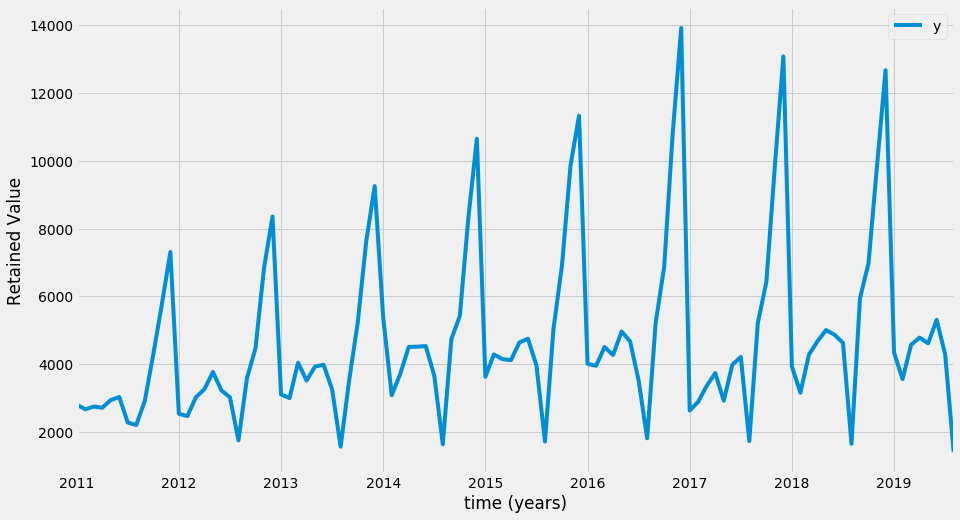

In [17]:
ax = df.set_index('ds').plot(figsize=(14, 8))
ax.set_ylabel('Retained Value' )
ax.set_xlabel('time (years)')
plt.show()

### we have seen from the box plot outliers but its not justifiable to remove them since they are not erroneous
~~~https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

# Train the model

### we instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter ours is 0.95

In [29]:
my_model = Prophet(interval_width=0.95)

### now instatiate the prophets fit method into the model

In [30]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### we create a new data frame for storing dates for the future predictions
### using prophets function for creating future data frame

In [33]:
future_dates=my_model.make_future_dataframe(periods=24, freq='MS'
                                           )
future_dates.tail()

,ds
123,2021-04-01
124,2021-05-01
125,2021-06-01
126,2021-07-01
127,2021-08-01


## we now make the prediction
>### we are working with monthly data, we clearly specified the desired frequency of the timestamps. Therefore, the _make_future_dataframe_ generated 24 monthly timestamps for us. In other words, we are looking to predict future values of our time series 2 years into the future

In [32]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
123,2021-04-01,5210.724710,3694.040776,6711.325169
124,2021-05-01,5421.442233,4011.482918,6896.215894
125,2021-06-01,5493.028238,4005.653290,7030.942145
126,2021-07-01,4904.215781,3465.519821,6281.600377
127,2021-08-01,2971.215500,1466.121159,4441.525356


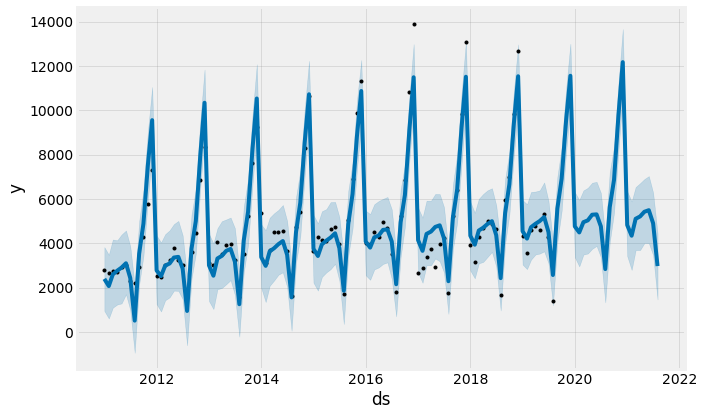

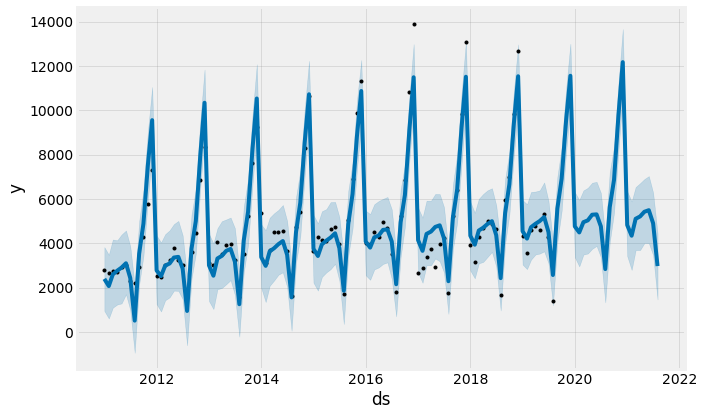

In [35]:
my_model.plot(forecast,uncertainty=True)

>###  ds: the datestamp of the forecasted value
>###   yhat: the forecasted value of our metric 
(in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
>### yhat_lower: the lower bound of our forecasts
>###    yhat_upper: the upper bound of our forecasts

### A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.


In [36]:
future_dates=my_model.make_future_dataframe(periods=24, freq='MS')
future_dates.tail()

,ds
123,2021-04-01
124,2021-05-01
125,2021-06-01
126,2021-07-01
127,2021-08-01
